In [33]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from collections import defaultdict
import yaml
import ROOT
import copy
import numpy as np
import pandas as pd
import root_pandas as rpd
from sklearn.metrics import roc_curve, auc

[1 1 0 ... 1 1 0]


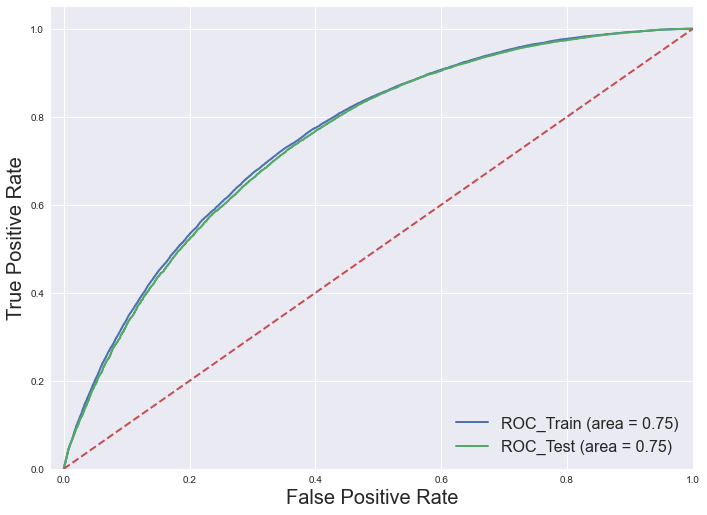

In [37]:
dir_ = 'IC_Model_ChiMass_100_DL'
file = os.path.join(dir_, 'TMVA.root')
df_train = rpd.read_root(file, key='dataset/TrainTree')[['classID', 'BDTD']]
df_test  = rpd.read_root(file, key='dataset/TestTree')[['classID', 'BDTD']]

#print(df_train[:10])

BDTD_train_ytrue = 1 - df_train['classID'].to_numpy()
print(BDTD_train_ytrue)
BDTD_train_ypred = df_train['BDTD'].to_numpy()
BDTD_test_ytrue  = 1 - df_test['classID'].to_numpy()
BDTD_test_ypred  = df_test['BDTD'].to_numpy()

fpr_train, tpr_train, _ = roc_curve(BDTD_train_ytrue, BDTD_train_ypred)
auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _   = roc_curve(BDTD_test_ytrue, BDTD_test_ypred)
auc_test  = auc(fpr_test, tpr_test)

plt.figure(figsize=(11.5, 8.5))
lw = 2
plt.plot(fpr_train, tpr_train,
         lw=lw, label='ROC_Train (area = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test,
         lw=lw, label='ROC_Test (area = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
#plt.title('ROC curve')
plt.legend(loc="lower right", fontsize=16)
plt.savefig(os.path.join(dir_,'ROC.png'), dpi=300)
plt.show()